In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.decomposition
import sklearn.preprocessing

In [2]:
data = pd.read_csv(r'../data/raw/FoodBalanceSheets_E_All_Data_(Normalized).csv', encoding='latin-1')

In [30]:
countries = pd.read_excel(r'../data/raw/country-group.xls')

In [3]:
countries = countries[countries['ISO2 Code'].isna() == False]['Country Code'].tolist()

In [31]:
continents = list(zip(countries['Country'],countries['Country Group']))
continents = {key:val for key,val in continents}

In [29]:
data['Continent'] = data['Area'].map(continents)

In [4]:
food_information = data[(
    data['Element Code'].isin([5301,511])
)][
    data['Area Code'].isin(countries)
]

C:\Users\ville\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [6]:
food_information = food_information[['Area', 'Item', 'Year Code', 'Value']]

In [7]:
food_information_pivot = pd.pivot_table(food_information, values='Value', index=['Area', 'Year Code'], columns=['Item']).reset_index()

In [8]:
food_information_pivot = food_information_pivot[food_information_pivot.columns[food_information_pivot.isna().sum()/food_information_pivot.shape[0] < 0.05]]

In [9]:
food_information_pivot.sort_values(by=['Area', 'Year Code'], inplace=True)
food_information_pivot.fillna(method='backfill', inplace=True)

In [10]:
food_information_pivot[food_information_pivot.columns[2:]] = food_information_pivot[food_information_pivot.columns[2:]].divide(food_information_pivot.Population, axis=0)

In [11]:
food_information_pivot.drop(columns ='Population', inplace=True)

In [12]:
normalizer = sklearn.preprocessing.StandardScaler()
food_information_pivot[food_information_pivot.columns[2:]] = normalizer.fit_transform(food_information_pivot[food_information_pivot.columns[2:]])

In [13]:
food_information_pivot = food_information_pivot.dropna()

In [14]:
piciei = sklearn.decomposition.PCA(2)
food_information_pivot_2d = piciei.fit_transform(food_information_pivot[food_information_pivot.columns[2:]])

In [15]:
food_information_pivot_2d = pd.concat([food_information_pivot[['Area','Year Code']], pd.DataFrame(food_information_pivot_2d)], axis=1)

In [16]:
food_information_pivot_2d.columns = ['Area','Year Code', 'PC1', 'PC2']

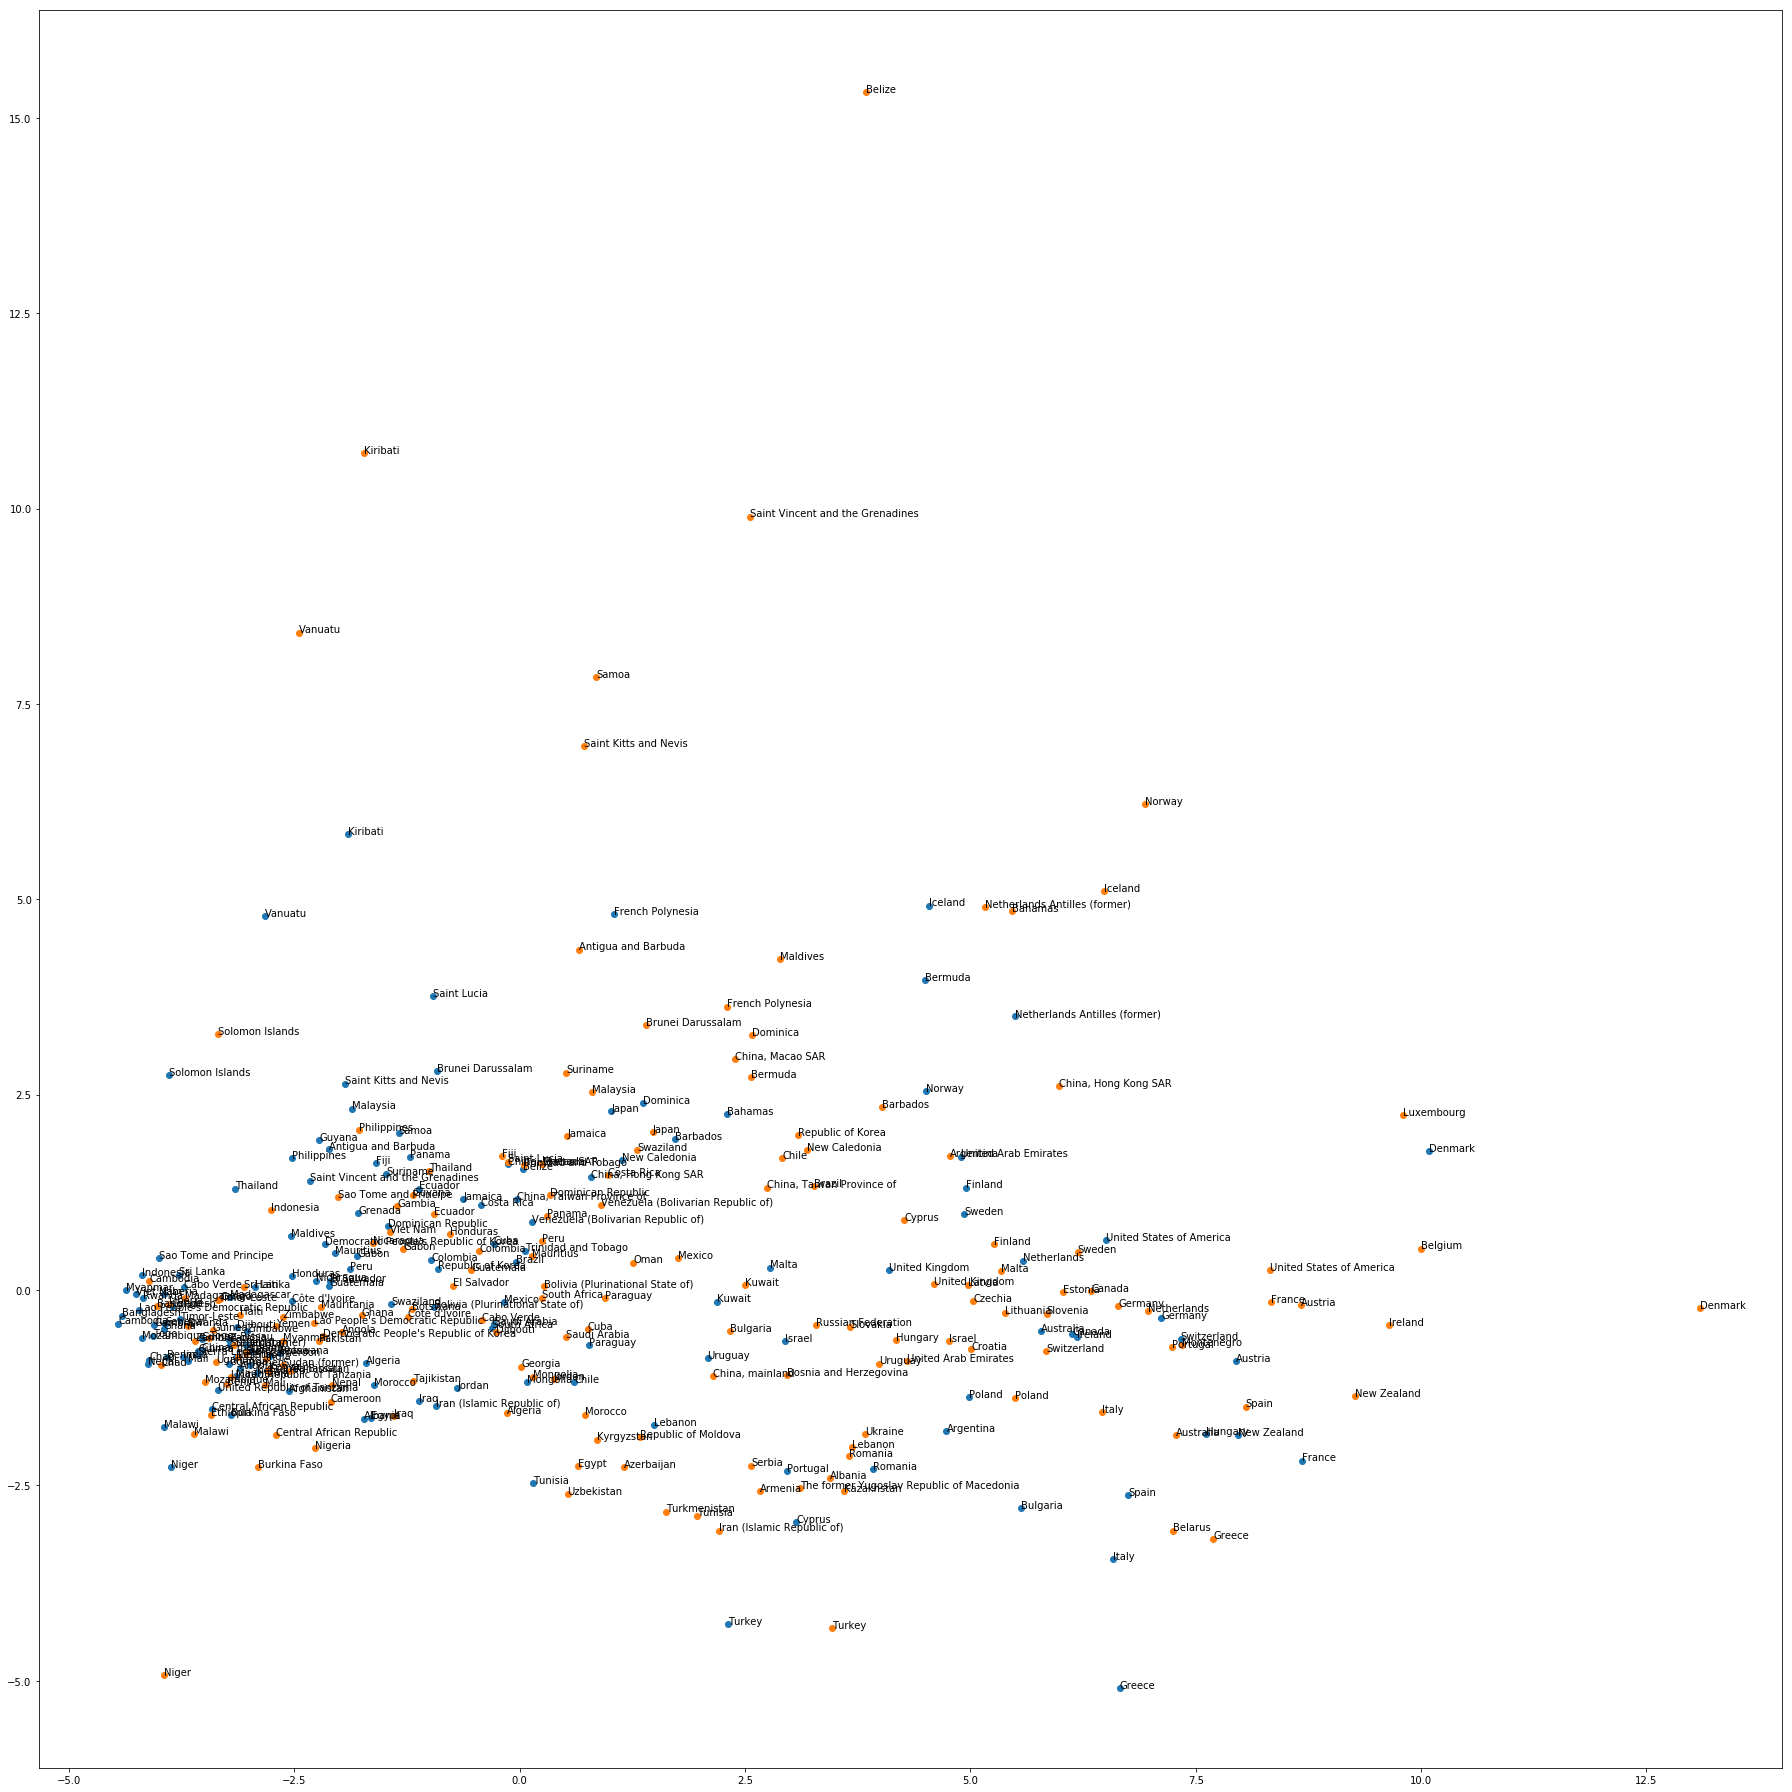

In [28]:
fig, ax = plt.subplots(figsize=(25,25))

ax.scatter(food_information_pivot_2d[food_information_pivot_2d['Year Code'] == 1980]['PC1'],
           food_information_pivot_2d[food_information_pivot_2d['Year Code'] == 1980]['PC2'] 
          )
for key, row in food_information_pivot_2d[food_information_pivot_2d['Year Code'] == 1980].iterrows():
    ax.annotate(row['Area'], xy=(row['PC1'], row['PC2']))
    
ax.scatter(food_information_pivot_2d[food_information_pivot_2d['Year Code'] == 2010]['PC1'],
           food_information_pivot_2d[food_information_pivot_2d['Year Code'] == 2010]['PC2'] 
          )
for key, row in food_information_pivot_2d[food_information_pivot_2d['Year Code'] == 2010].iterrows():
    ax.annotate(row['Area'], xy=(row['PC1'], row['PC2']))

fig.tight_layout()
fig.savefig('exploration.pdf')

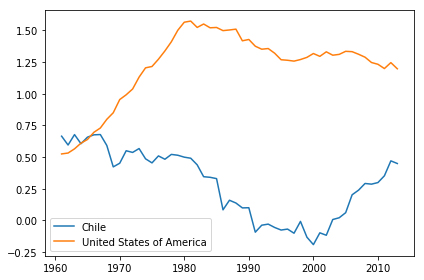

In [19]:
plt.plot(
    food_information_pivot[food_information_pivot['Area'] == 'Chile']['Year Code'],
    food_information_pivot[food_information_pivot['Area'] == 'Chile']['Alcoholic Beverages'],
    label='Chile'
)
plt.plot(
    food_information_pivot[food_information_pivot['Area'] == 'United States of America']['Year Code'],
    food_information_pivot[food_information_pivot['Area'] == 'United States of America']['Alcoholic Beverages'],
    label='United States of America'
)
plt.tight_layout()
plt.legend()
plt.show()